# Feature Based Semantic Memory Model

<ul>
<li>The core idea of a feature based model is that words are represented in memory as a collection of binary features.
<ul><li> <i>Birds</i> have <i>wings</i>; <i>Dogs</i> do not have <i>wings</i></ul>
<li> The correlation or overlap of these features determines the extent to which words have similar meanings.

<li>Concepts have two types in features:
<ul>
<li>Defining Feature (eg. All birds <i>have wings</i>)
<li>Characteristic Feature (eg. Not all birds <i>fly</i>)
</ul>

<li> The overlap in features were similar to set theoretical functions.
</ul>

### Import Networkx and Venn libraries for visualization purposes

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import venn

### Define `features` with the concepts that follow those features.

In [3]:
features = {
    'wings':['bird', 'bat'],
    'four_legs':['cat', 'dog'],
    'tail':['cat', 'dog','bird'],
    'feathers':['bird'],
    'whiskers':['cat']
}

### Take out the `concepts` from the features to build the nodes for the Associative Network

In [4]:
concepts = set(concept for concepts in features.values() for concept in concepts)
concepts

{'bat', 'bird', 'cat', 'dog'}

In [5]:
semantic_memory = nx.Graph()
semantic_memory

In [6]:
semantic_memory.add_nodes_from(concepts)
semantic_memory.nodes

NodeView(('dog', 'bat', 'bird', 'cat'))

### Define a function `get_features` that takes in a concept and returns the features for that particular concept

In [7]:
def get_features(concept):
    feature = []
    for feat, conc in features.items():
        if concept in conc:
            feature.append(feat)
    
    return feature

### From these concept-specific-features create edges for the network

In [8]:
for concept1 in concepts:
    for concept2 in concepts:
        if concept1 != concept2:
            feature = [feature for feature in get_features(concept1) if feature in get_features(concept2)]
            if len(feature) > 0:
                semantic_memory.add_edge(concept1, concept2, relation=feature)

### Define the positions `pos` and plot the network

In [9]:
pos = nx.spring_layout(semantic_memory, seed=42)
pos

{'dog': array([-0.32457674,  0.75279986]),
 'bat': array([ 1.       , -0.7486501]),
 'bird': array([ 0.13831951, -0.10355323]),
 'cat': array([-0.81374277,  0.09940348])}

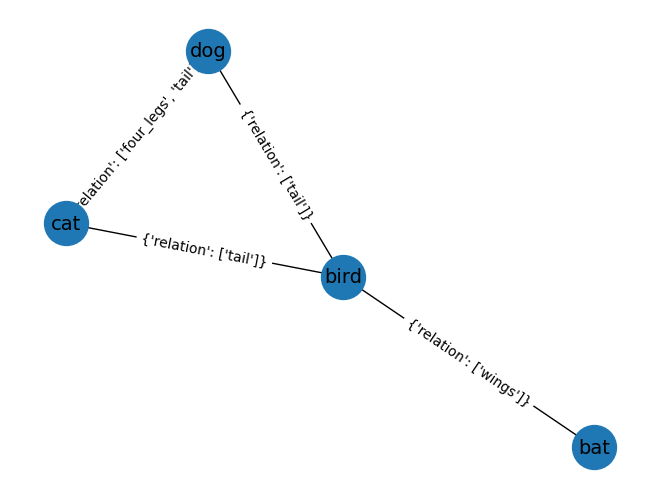

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
nx.draw(semantic_memory, pos, ax, with_labels=True, node_size=1000, font_size=14)
nx.draw_networkx_edge_labels(semantic_memory, pos)
plt.show()

### Separate Features for the concepts in `sets`

In [11]:
setBird = set(get_features('bird'))
setBat = set(get_features('bat'))
setDog = set(get_features('dog'))
setCat = set(get_features('cat'))

### Create Venn Diagrams to visualize the overlap in the features

<Axes: >

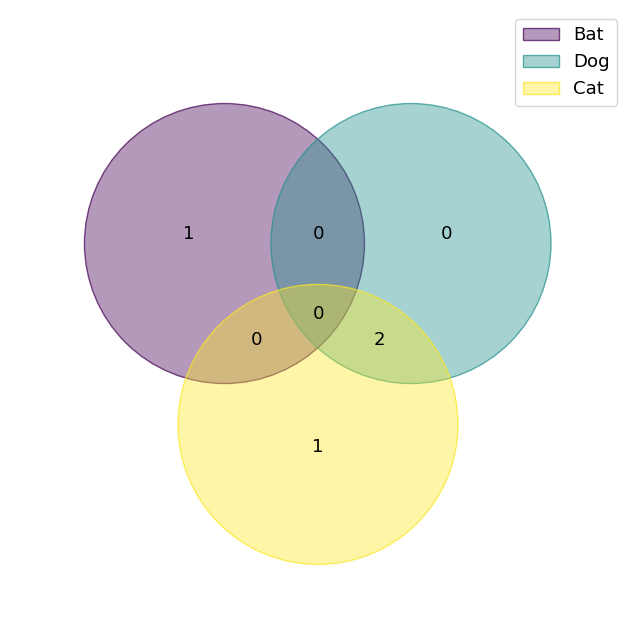

In [12]:
venn.venn({'Bat':setBat, 'Dog':setDog, 'Cat':setCat})


In [13]:
value = {'Bird':setBird,
             'Bat':setBat,
              'Dog':setDog,
                'Cat':setCat}

<Axes: >

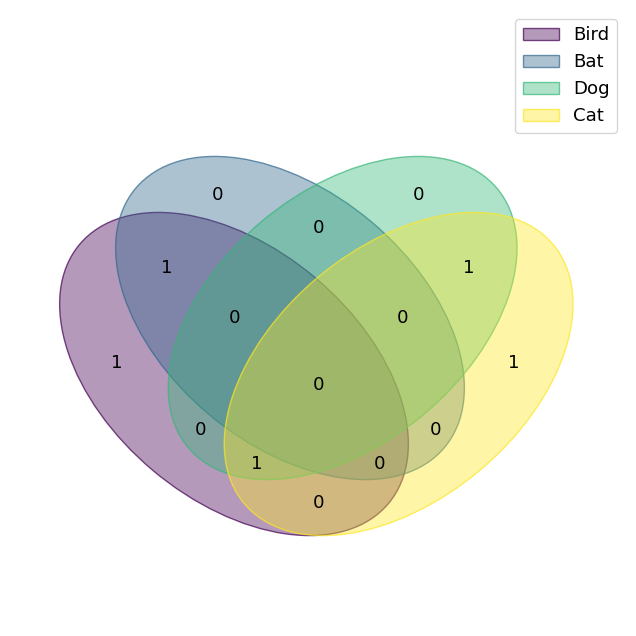

In [14]:
venn.venn(value)


### Quantifying the correlation/overlap

Lets take an example of `robin` is a `bird`

We define the features of `robin` as `wings`,`tails`,`feathers`, `small` and `orange`

`orange` color and `small` size are a characteristic feature of the robin. The others are the defining features of bird.
Thus if all features of `bird` are in the features of `robin`, it is a high chance that `robin` is a `bird`

In [15]:
setBird

{'feathers', 'tail', 'wings'}

In [16]:
setRobin = {'wings', 'tail', 'feathers', 'orange', 'small'}

<Axes: >

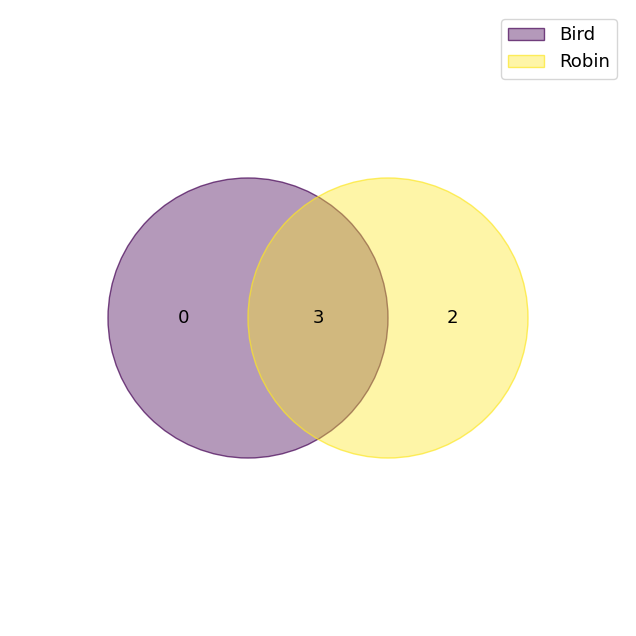

In [17]:
venn.venn({'Bird':setBird, 'Robin': setRobin})

As we can see in the above venn diagram, all features of bird are in robin.

In [18]:
def jaccard_similarity(A, B):
    intersection = len(A.intersection(B))
    union = len(A.union(B))
    try:
        return round(intersection/union, 3)
    except ZeroDivisionError:
        return 0.0


jaccard_similarity(setBird, setRobin)

0.6

There is a complete overlap between Defining Feature of Birds in Robin. And the Jaccard Similarity is also high. Thus Robin is Most probably a Bird.

We can see it in another example.

Is Bat similar to a Dog?

In [21]:
jaccard_similarity(setBat, setDog)

0.0

Thus there is no overlap between Dog and Bat with the given defining features

In [22]:
jaccard_similarity(setCat, setDog)

0.667

And there is also quite a lot similarity between Cat and Dog. (Even more than Robin and Bird? Well it depends on the data we provided.)